In [1]:
#ipython magic
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [63]:
#general imports
import sys
sys.path.append('..')
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')

In [64]:
from utils.opto_stim_import2 import BlimpImport

In [67]:
#global plotting params
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


### Analysis of the 50 cells experiment

In [5]:
laser_ons = []
laser_offs = []


In [6]:
blimper = BlimpImport('RL022')
laser_ons.append(blimper.get_object_and_test(2))
laser_offs.append(blimper.get_object_and_test(3))

Importing data file: RL022-2019-05-01-195448.txt
pycontrol RL022-2019-05-01-195448 successfully matched to blimp folder 2019-05-01-195339
pycontrol RL022-2019-05-01-195448 rsync successfully matched to paq 2019-05-01_RL022_003.paq
Importing data file: RL022-2019-05-01-210056.txt
pycontrol RL022-2019-05-01-210056 successfully matched to blimp folder 2019-05-01-210033
pycontrol RL022-2019-05-01-210056 rsync could not be matched to paq 2019-05-01_RL022_003.paq


In [7]:
blimper = BlimpImport('RL023')
laser_ons.append(blimper.get_object_and_test(2))
laser_offs.append(blimper.get_object_and_test(1))

Importing data file: RL023-2019-05-01-173332.txt
pycontrol RL023-2019-05-01-173332 successfully matched to blimp folder 2019-05-01-173241
pycontrol RL023-2019-05-01-173332 rsync successfully matched to paq 2019-05-01_RL023_002.paq
Importing data file: RL023-2019-04-30-235429.txt
pycontrol RL023-2019-04-30-235429 successfully matched to blimp folder 2019-04-30-235404
pycontrol RL023-2019-04-30-235429 rsync successfully matched to paq 2019-04-30_RL023_003.paq


In [8]:
blimper = BlimpImport('RL032')
laser_ons.append(blimper.get_object_and_test(0))
laser_offs.append(blimper.get_object_and_test(1))


Importing data file: RL032-2019-05-01-224432.txt
pycontrol RL032-2019-05-01-224432 successfully matched to blimp folder 2019-05-01-224345
pycontrol RL032-2019-05-01-224432 rsync successfully matched to paq 2019-05-01_RL032_003.paq
Importing data file: RL032-2019-05-01-234839.txt
pycontrol RL032-2019-05-01-234839 successfully matched to blimp folder 2019-05-01-234822
pycontrol RL032-2019-05-01-234839 rsync successfully matched to paq 2019-05-01_RL032_003.paq


In [9]:
laser_ons

In [10]:
dprimes_on = [laser_ons[i].dprime for i in range(len(laser_ons))]
dprimes_off = [laser_offs[i].dprime for i in range(len(laser_offs))]

dprimes_on[2] = dprimes_on[2] - 0.2 

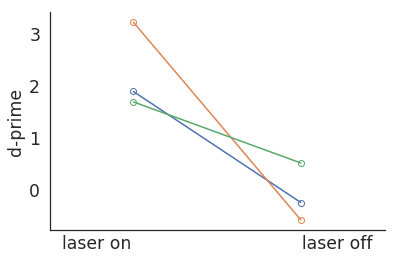

In [79]:
for i in range(len(laser_ons)):    
    plt.plot(np.linspace(1,2,100), np.linspace(dprimes_on[i], dprimes_off[i], 100), marker ='o', markevery=[0,-1], markerfacecolor='none')
    #plt.plot(1, dprimes_on[i])
    #plt.plot(2, dprimes_off[i])

plt.xlim([0.5,2.5])
sns.despine()    
plt.ylabel('d-prime')
plt.xlabel('laser on                               laser off')
plt.xticks([], [])
plt.savefig('/home/jamesrowland/Documents/byod_labmeeting/dprimey.png')
    
    

In [58]:
really_good = laser_ons[2]
rg_off = laser_offs[1]



In [59]:
#licks are binned and normalised to trial start time
binned_licks = np.array(really_good.binned_licks)

trial_type = np.array(really_good.trial_type)
tt_inds = trial_type.argsort()

sorted_licks = binned_licks[tt_inds]
num_go = len(np.where(trial_type=='go')[0])

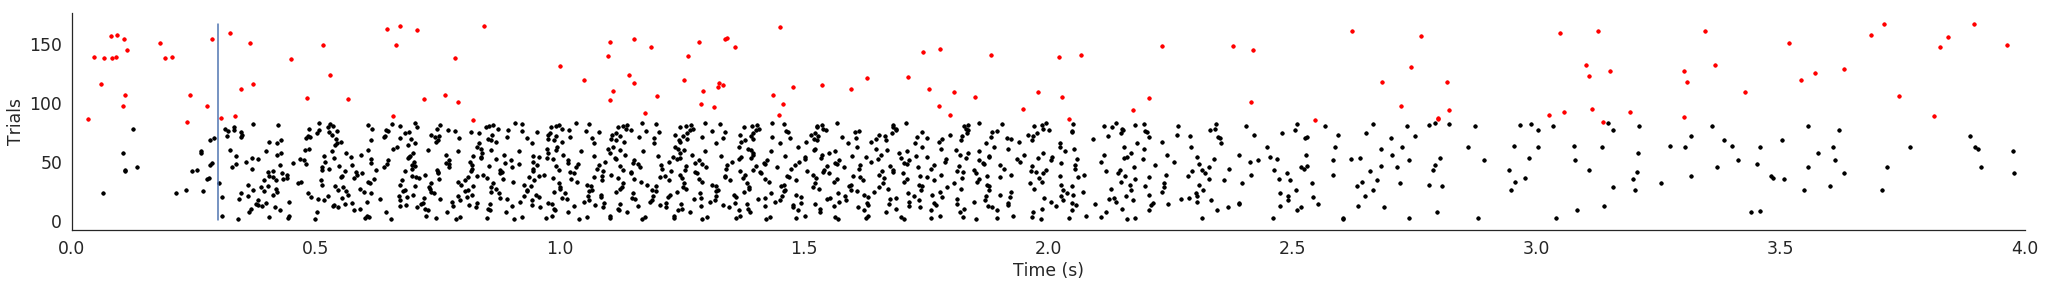

In [73]:
plt.figure(figsize=[35,4])


for i,b in enumerate(sorted_licks):
    y_axis = np.ones(len(b)) + (i) 
    if i < num_go:
        color = 'black'
    else:
        color = 'red'
    plt.plot(b/1000, y_axis,'.',c=color)

    plt.plot(b/1000, y_axis,'.',c=color)
    
plt.xlim((0,4))
plt.plot([0.3]*100, np.linspace(0,i,100))
    
plt.xlim((0,4))
sns.despine()
plt.xlabel('Time (s)')
plt.ylabel('Trials')
plt.savefig('/home/jamesrowland/Documents/byod_labmeeting/licky_raster3.png')


In [ ]:
outcome = list(really_good.outcome)
outcome2 = list(rg_off.outcome)

combined = outcome+outcome2
combined

In [ ]:
binary = []

for t in combined:
    if t == 'hit':
        binary.append(1)
    if t == 'miss':
        binary.append(0)

In [ ]:
running = np.convolve(binary, np.ones((10,))/10, mode='valid')

In [ ]:

plt.plot(running)
plt.plot([105]* 100, np.linspace(0,1,100)) 
plt.xlabel('hit rate')
plt.ylabel('trial number')
sns.despine()
plt.savefig('/home/jamesrowland/Documents/byod_labmeeting/hit_ratey.png')

In [ ]:
len(outcome)

In [ ]:
len(running)